In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")

import numpy as np
from utility import Utility
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import random_unitary
from logger import Logger
from quantum_state import QuantumState
import copy
import matplotlib.pyplot as plt
from povm import Povm
from quantum_measurement import QuantumMeasurement
from qiskit.quantum_info.operators.operator import Operator

In [60]:
def print_vector(vec):
    for e in vec:
        print(f'{e:.4f}', end=', ')
    print()

# 1 The Unitary Operator

In [61]:
num_sensor = 2
theta = 45
seed =  2

unitary_operator = Utility.generate_unitary_operator(theta, seed)
Utility.print_matrix('Unitary Operator:', unitary_operator.data)

Unitary Operator:
( 0.70711+0.59699i) ( 0.27154-0.26433i) 
(-0.27154-0.26433i) ( 0.70711-0.59699i) 


### 1.1 Verify if $(U^{\dagger} \otimes U \otimes I $) is unitary if $U$ is unitary

In [62]:
for theta in range(1, 102, 10):
    for seed in range(10):
        U = Utility.generate_unitary_operator(theta, seed)
        U_inv = Operator(np.linalg.inv(U.data))
        I = Operator(np.eye(2))
        prod = U_inv.tensor(U)
        prod = prod.tensor(I)
        print(prod.is_unitary(), end=' ')

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

### 1.2 Eigen value and eigen vector of $U$

In [63]:
theta = 40
seed = 2
RAD = 180/np.pi

In [65]:
U = Utility.generate_unitary_operator(theta, seed)
e_vals, e_vectors = np.linalg.eig(U.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[0].real, e_vals[0].imag) * RAD}')
print('eigen vectors')
for i in range(len(e_vectors[0])):
    print(f'vector {i}: ', end = '')
    print_vector(e_vectors[:, i])

eigen values
0.7660+0.6428j, 0.7660-0.6428j, 
theta = 39.99999999999999
eigen vectors
vector 0: 0.9603+0.0000j, -0.1946+0.2000j, 
vector 1: 0.1946+0.2000j, 0.9603+0.0000j, 


### 1.3 Eigen value and eigen vector of $(U^{\dagger} \otimes U$)

In [68]:
U = Utility.generate_unitary_operator(theta, seed)
U_inv = Operator(np.linalg.inv(U.data))
prod = U_inv.tensor(U)
e_vals, e_vectors = np.linalg.eig(prod.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[2].real, e_vals[2].imag) * RAD}')
print('eigen vectors')
for i in range(len(e_vectors[0])):
    print(f'vector {i}: ', end = '')
    print_vector(e_vectors[:, i])

eigen values
0.1736-0.9848j, 1.0000-0.0000j, 0.1736+0.9848j, 1.0000+0.0000j, 
theta = 80.0
eigen vectors
vector 0: 0.1869+0.1920j, 0.9221+0.0000j, -0.0779-0.0000j, -0.1869+0.1920j, 
vector 1: 0.9254+0.0000j, -0.1705+0.1752j, -0.1705+0.1752j, -0.0042-0.1551j, 
vector 2: 0.1869+0.1920j, -0.0779+0.0000j, 0.9221+0.0000j, -0.1869+0.1920j, 
vector 3: -0.1151+0.0423j, 0.2177+0.1718j, 0.2177+0.1718j, 0.9117+0.0000j, 


### 1.4 Eigen value and eigen vector of $(U^{\dagger} \otimes U \otimes I $)

In [69]:
U = Utility.generate_unitary_operator(theta, seed)
U_inv = Operator(np.linalg.inv(U.data))
I = Operator(np.eye(2))
prod = U_inv.tensor(U)
prod = prod.tensor(I)
e_vals, e_vectors = np.linalg.eig(prod.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[2].real, e_vals[2].imag) * RAD}')
print('eigen vectors')
for i in range(len(e_vectors[0])):
    print(f'vector {i}: ', end = '')
    print_vector(e_vectors[:, i])

eigen values
0.1736-0.9848j, 1.0000+0.0000j, 0.1736+0.9848j, 0.1736+0.9848j, 0.1736-0.9848j, 1.0000-0.0000j, 1.0000+0.0000j, 1.0000+0.0000j, 
theta = 80.0
eigen vectors
vector 0: 0.1869+0.1920j, -0.0000+0.0000j, 0.9221+0.0000j, -0.0000+0.0000j, -0.0779-0.0000j, -0.0000+0.0000j, -0.1869+0.1920j, -0.0000+0.0000j, 
vector 1: 0.9254+0.0000j, -0.0000-0.0000j, -0.1705+0.1752j, 0.0000+0.0000j, -0.1705+0.1752j, 0.0000+0.0000j, -0.0042-0.1551j, 0.0000+0.0000j, 
vector 2: 0.1869+0.1920j, 0.0000+0.0000j, -0.0779-0.0000j, 0.0000+0.0000j, 0.9221+0.0000j, 0.0000+0.0000j, -0.1869+0.1920j, 0.0000+0.0000j, 
vector 3: 0.0264-0.0045j, 0.1860+0.1910j, -0.0044+0.0064j, -0.0775+0.0000j, 0.0525-0.0759j, 0.9175+0.0000j, 0.0052+0.0263j, -0.1860+0.1910j, 
vector 4: 0.0268+0.0184j, 0.1855+0.1906j, 0.1097-0.0220j, 0.9153+0.0000j, -0.0093+0.0019j, -0.0773-0.0000j, -0.0176+0.0273j, -0.1855+0.1906j, 
vector 5: 0.2357-0.3162j, 0.5873+0.0000j, 0.1883+0.1555j, -0.1339+0.0680j, 0.1883+0.1555j, -0.1339+0.0680j, 0.4425-0.

### 1.5 visulization of $U$'s eigen value

eigen value 1: (0.7660444431189781+0.6427876096865393j)
eigen value 2: (0.7660444431189781-0.6427876096865393j)
eigen vector 1: [ 0.96027764+0.j         -0.19464174+0.19995362j]
eigen vector 2: [0.19464174+0.19995362j 0.96027764+0.j        ]
[[ 0.76604444+0.54268391j  0.24684457-0.24028701j]
 [-0.24684457-0.24028701j  0.76604444-0.54268391j]]


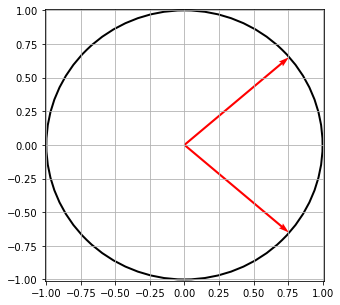

In [51]:
e_vals, e_vectors = np.linalg.eig(U.data)

print('eigen value 1:', e_vals[0])
print('eigen value 2:', e_vals[1])
print('eigen vector 1:', e_vectors[:, 0])
print('eigen vector 2:', e_vectors[:, 1])

Lambda = np.array([[e_vals[0], 0], [0, e_vals[1]]])
Q = np.stack([e_vectors[:, 0], e_vectors[:, 1]], axis=1)
Q_inv = np.linalg.inv(Q)
print(np.dot(Q, np.dot(Lambda, Q_inv)))


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
ax.add_patch(circle)
Ox = [0, 0]
Oy = [0, 0]
Vx = [e_vals[0].real, e_vals[1].real]
Vy = [e_vals[0].imag, e_vals[1].imag]
color = ['r', 'r']
plt.quiver(Ox, Oy, Vx, Vy, units='xy', color=color, scale=1)
plt.grid()
plt.show()

# 2 The Initial State by Hill Climbing and Guess | Visualization

In [53]:
# read from the logs

logs = ['../result/5.11.2022/verify']
data = Logger.read_log(logs)
initstate_hills = []
initstate_guess = QuantumState(num_sensor)

guess = False
for experiment in data:
    myinput = experiment[0]
    if myinput.unitary_theta != 45:
        continue
#     print(myinput)
    output_by_method = experiment[1]
    if 'Hill climbing' in output_by_method:
#         print(output_by_method['Hill climbing'].init_state)
        init_state = QuantumState(num_sensor)
        init_state.set_statevector_from_str(output_by_method['Hill climbing'].init_state)
        initstate_hills.append([init_state, output_by_method['Hill climbing'].success])

    if 'Guess' in output_by_method and guess is False:
        guess = True
        print(myinput)
        print(output_by_method['Guess'].init_state)
        initstate_guess.set_statevector_from_str(output_by_method['Guess'].init_state)
        for cplx in initstate_guess.state_vector:
            print(round(abs(cplx)**2, 4), end=' ')
        print()
        print(f"Guess success rate = {output_by_method['Guess'].success}\n")

{"experiment_id": 0, "num_sensor": 2, "priors": [0.5, 0.5], "unitary_seed": 2, "unitary_theta": 45.0}

Guess
Initial state:
|00>:  0.264331  0.271545i
|01>:  0.596986  0.000000i
|10>:  0.596986  0.000000i
|11>: -0.264331  0.271545i

0.1436 0.3564 0.3564 0.1436 
Guess success rate = 1.0000109



In [ ]:
for i, (qstate, prob) in enumerate(initstate_hills):
    print(i)
    print(qstate)
    for cplx in qstate.state_vector:
        print(round(abs(cplx)**2, 4), end=' ')
    print()
    print(prob)
    print()

Hill climb initial state:

(0.086646+0.042082j) abs = 0.00927842404
(-0.451674-0.565973j) abs = 0.524334839005
(0.587925+0.335274j) abs = 0.4580644607010001
(-0.021076+0.088757j) abs = 0.008322002825


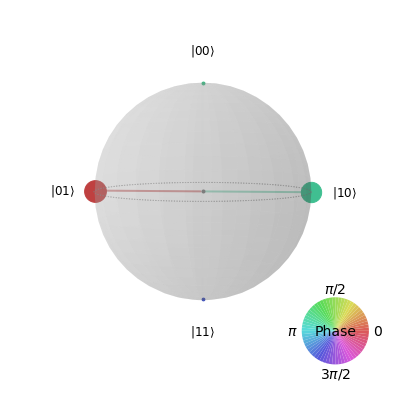

In [26]:
print('Hill climb initial state:\n')
for cplx in initstate_hill.state_vector:
    print(cplx, 'abs =', abs(cplx)**2)
plot_state_qsphere(initstate_hill.state_vector)
plt.show()

Guess initial state:

(0.264331+0.271545j) abs = 0.143607564586
(0.596986+0j) abs = 0.356392284196
(0.596986+0j) abs = 0.356392284196
(-0.264331+0.271545j) abs = 0.143607564586


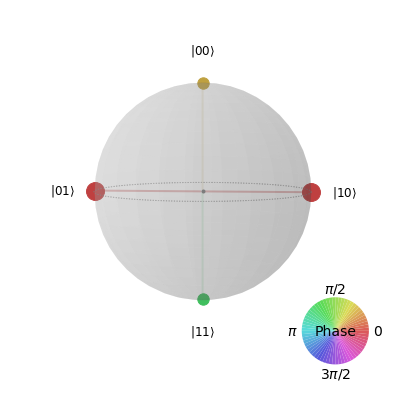

In [28]:
print('Guess initial state:\n')
for cplx in initstate_guess.state_vector:
    print(cplx, 'abs =', abs(cplx)**2)
plot_state_qsphere(initstate_guess.state_vector)
plt.show()

# 3 Prepare the States to be Discriminated from the Initial State

## 3.1 Hill Climbing

In [77]:
index = 19
quantum_states_hill = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_hills[index][0])
    init_state_copy.evolve(evolve_operator)
    quantum_states_hill.append(init_state_copy)
    
for state in quantum_states_hill:
    print(state)

|00>: -0.073186 -0.349470i
|01>: -0.357323 -0.492717i
|10>: -0.596094 -0.124004i
|11>:  0.354282 -0.076444i

|00>: -0.025666 -0.111678i
|01>: -0.521407  0.463441i
|10>:  0.209279 -0.664854i
|11>:  0.117855 -0.022540i



### 3.1.1 Hill Climb Check Orthogonal: the absolute value is very close to zero

In [78]:
n = len(quantum_states_hill)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_hill[i].state_vector), quantum_states_hill[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (4.38750072925681e-05-1.0237080961622569e-05j), absolute value = 0.000045


# 3.2 Guess

In [93]:
initstate_guess_copy = copy.deepcopy(initstate_guess)

In [94]:
print(initstate_guess)

|00>:  0.264331  0.271545i
|01>:  0.596986  0.000000i
|10>:  0.596986  0.000000i
|11>: -0.264331  0.271545i



In [95]:
initstate_guess_copy.state_vector[0] = 0.264331 - 0.271545j

In [96]:
print(initstate_guess_copy)

|00>:  0.264331 -0.271545i
|01>:  0.596986  0.000000i
|10>:  0.596986  0.000000i
|11>: -0.264331  0.271545i



In [97]:
quantum_states_guess = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_guess_copy)
    init_state_copy.evolve(evolve_operator)
    quantum_states_guess.append(init_state_copy)

In [98]:
for state in quantum_states_guess:
    print(state)

|00>:  0.511127 -0.192011i
|01>:  0.422133  0.500000i
|10>:  0.278577 -0.352527i
|11>: -0.186910  0.192012i

|00>:  0.511127 -0.192011i
|01>:  0.278577 -0.352527i
|10>:  0.422133  0.500000i
|11>: -0.186910  0.192012i



### 3.2.1 Guess Check Orthogonal: absolute value far away from zero

In [99]:
n = len(quantum_states_guess)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_guess[i].state_vector), quantum_states_guess[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (0.2525897262945906+0j), absolute value = 0.252590


# 4 Let's do the Measurement!

## 4.1 Hill Climbing: Use Semidefinite Programming to Generate the POVM

In [41]:
povm_hill = Povm()

priors = [1./2, 1./2]   # equal priors
povm_hill.semidefinite_programming_minerror(quantum_states_hill, priors, debug=False)

In [42]:
print(f'The theoretical success rate = {povm_hill.theoretical_success}')
print(f'The theoretical error rate = {povm_hill.theoretical_error}')

The theoretical success rate = 0.9999988488254352
The theoretical error rate = 1.1511745647840854e-06


## 4.2 Hill climbing: Let's do the Quantum Measurement Simulation

In [43]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_hill, priors)
qm.povm = povm_hill
error = qm.simulate(simulate_seed, repeat)
print(f'The simulated error = {error}')

The simulated error = 2e-06


In [44]:
print(f'Hill climbing: the simulated error ({error}) is very close to the theoretical error ({povm_hill.theoretical_error})')

Hill climbing: the simulated error (2e-06) is very close to the theoretical error (1.1511745647840854e-06)


## 4.3 Guess: Use the Pretty Good Measurement to Generate the POVM and do Measurement Simulation

In [45]:
povm_guess = Povm()
povm_guess.pretty_good_measurement(quantum_states_guess, priors, debug=False)

In [46]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_prettygood_error = qm.simulate(simulate_seed, repeat)

In [47]:
print(f'Guess: pretty good measurement, the simulated error = {guess_prettygood_error}')

Guess: pretty good measurement, the simulated error = 0.0


## 4.4 Guess: Use the Semidefinite Programming to Generate the POVM and do Measurement Simulation

In [51]:
povm_guess.semidefinite_programming_minerror(quantum_states_guess, priors, debug=False)

In [42]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_sdp_error = qm.simulate(simulate_seed, repeat)

In [43]:
print(f'Guess: semidefinte programming, the simulated error = {guess_sdp_error}')

Guess: semidefinte programming, the simulated error = 0.073956


In [45]:
print(f'Guess: the pretty good measurement simulated error ({guess_prettygood_error}) is very close to the SDP simulated error ({guess_sdp_error})')

Guess: the pretty good measurement simulated error (0.073945) is very close to the SDP simulated error (0.073956)


# 5 Comparing Hill climbing and Guess

In [50]:
print(f'When the theta is 90 degrees, by simulation, the success rate for Hill climbing is {povm_hill.theoretical_success:.6f}, which is larger than Guess success rate {1 - guess_prettygood_error}')

When the theta is 90 degrees, by simulation, the success rate for Hill climbing is 0.999987, which is larger than Guess success rate 0.926055
